In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each longitude and latitude conbination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# print the city length to confirm sufficient count

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1    
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | sakakah
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | chumikan
Processing Record 8 of Set 1 | kavaratti
Processing Record 9 of Set 1 | malanje
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | chimore
Processing Record 13 of Set 1 | sorong
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | amga
Processing Record 22 of Set 1 | ka

Processing Record 40 of Set 4 | vallenar
Processing Record 41 of Set 4 | clyde river
Processing Record 42 of Set 4 | sao filipe
Processing Record 43 of Set 4 | muisne
Processing Record 44 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | khandyga
Processing Record 47 of Set 4 | viedma
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | krasnoselkup
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | yeppoon
Processing Record 2 of Set 5 | sorvag
City not found. Skipping...
Processing Record 3 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 5 | ust-bolsheretsk
City not found. Skipping...
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | newport
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | laguna
Processing Record 9 of Set 5 | ciudad bolivar
Processing Record 10 of Set 5 | port blair
Processing Record 11 of Set 5 

Processing Record 27 of Set 8 | lasa
Processing Record 28 of Set 8 | hinton
Processing Record 29 of Set 8 | kibala
Processing Record 30 of Set 8 | abha
Processing Record 31 of Set 8 | yerbogachen
Processing Record 32 of Set 8 | bonavista
Processing Record 33 of Set 8 | impfondo
Processing Record 34 of Set 8 | rancho palos verdes
Processing Record 35 of Set 8 | monthey
Processing Record 36 of Set 8 | tabou
Processing Record 37 of Set 8 | kalevala
Processing Record 38 of Set 8 | husavik
Processing Record 39 of Set 8 | gombong
Processing Record 40 of Set 8 | sulangan
Processing Record 41 of Set 8 | murray bridge
Processing Record 42 of Set 8 | general pico
Processing Record 43 of Set 8 | zhuanghe
Processing Record 44 of Set 8 | shakiso
Processing Record 45 of Set 8 | luderitz
Processing Record 46 of Set 8 | kudahuvadhoo
Processing Record 47 of Set 8 | tocantinopolis
City not found. Skipping...
Processing Record 48 of Set 8 | vila franca do campo
Processing Record 49 of Set 8 | faanui
Proc

Processing Record 12 of Set 12 | opuwo
Processing Record 13 of Set 12 | okha
Processing Record 14 of Set 12 | manoel urbano
Processing Record 15 of Set 12 | wewak
Processing Record 16 of Set 12 | sitio novo do tocantins
Processing Record 17 of Set 12 | lata
Processing Record 18 of Set 12 | tres arroyos
Processing Record 19 of Set 12 | deputatskiy
Processing Record 20 of Set 12 | batouri
Processing Record 21 of Set 12 | monaghan
Processing Record 22 of Set 12 | broome
Processing Record 23 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 24 of Set 12 | gat
Processing Record 25 of Set 12 | keelung
Processing Record 26 of Set 12 | zaysan
Processing Record 27 of Set 12 | karakol
Processing Record 28 of Set 12 | garissa
Processing Record 29 of Set 12 | canandaigua
Processing Record 30 of Set 12 | sawtell
Processing Record 31 of Set 12 | northport
Processing Record 32 of Set 12 | stoyba
City not found. Skipping...
Processing Record 33 of Set 12 | nieves
Processing Record 3

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,78.78,74,20,17.27,US,2022-02-17 03:36:53
1,Hermanus,-34.4187,19.2345,59.90,73,0,11.88,ZA,2022-02-17 03:36:54
2,Sakakah,29.9697,40.2064,44.17,46,40,3.51,SA,2022-02-17 03:36:54
3,Mataura,-46.1927,168.8643,78.93,30,39,5.08,NZ,2022-02-17 03:36:55
4,Chumikan,54.7183,135.3150,8.08,81,100,12.37,RU,2022-02-17 03:36:55
5,Kavaratti,10.5669,72.6420,80.56,69,12,11.07,IN,2022-02-17 03:36:55
6,Malanje,-9.5402,16.3410,62.64,99,100,3.98,AO,2022-02-17 03:36:56
7,Puerto Ayora,-0.7393,-90.3518,75.70,82,100,6.04,EC,2022-02-17 03:36:56
8,Jamestown,42.0970,-79.2353,51.39,38,100,11.50,US,2022-02-17 03:32:11
9,Chimore,-16.9833,-65.1333,73.85,95,88,2.35,BO,2022-02-17 03:36:56


In [11]:
city_data_new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_updated_df = city_data_df[city_data_new_order]
city_data_updated_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-02-17 03:36:53,22.0752,-159.3190,78.78,74,20,17.27
1,Hermanus,ZA,2022-02-17 03:36:54,-34.4187,19.2345,59.90,73,0,11.88
2,Sakakah,SA,2022-02-17 03:36:54,29.9697,40.2064,44.17,46,40,3.51
3,Mataura,NZ,2022-02-17 03:36:55,-46.1927,168.8643,78.93,30,39,5.08
4,Chumikan,RU,2022-02-17 03:36:55,54.7183,135.3150,8.08,81,100,12.37
5,Kavaratti,IN,2022-02-17 03:36:55,10.5669,72.6420,80.56,69,12,11.07
6,Malanje,AO,2022-02-17 03:36:56,-9.5402,16.3410,62.64,99,100,3.98
7,Puerto Ayora,EC,2022-02-17 03:36:56,-0.7393,-90.3518,75.70,82,100,6.04
8,Jamestown,US,2022-02-17 03:32:11,42.0970,-79.2353,51.39,38,100,11.50
9,Chimore,BO,2022-02-17 03:36:56,-16.9833,-65.1333,73.85,95,88,2.35


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

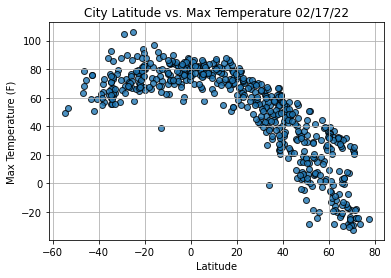

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

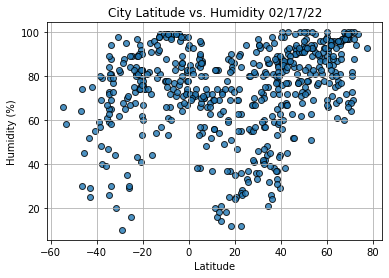

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

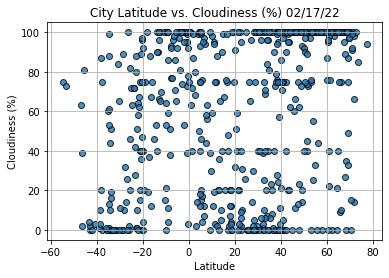

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

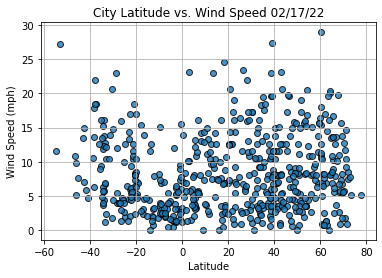

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()